In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from kmodes.kmodes import KModes
import mca

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import FactorAnalysis

In [56]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [57]:
os.chdir('/Users/Weiyang/Desktop/Morris Hitte Customer Insights')

In [59]:
dataset = pd.read_csv('final_dataset_with RFM.csv')

In [60]:
dataset.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars
0,2517,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,M,O,S,M,A,5,0,0,0,0,0,0,B,D,B,B,9,Y,E,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,C,C,NaN,U,U,U,Y,N,1,80
1,2518,2,4,1,C,1,B,1,C,B,F,NaN,0,NaN,0,NaN,0,NaN,0,S,U,S,F,D,1,0,0,1,0,0,0,H,B,B,B,5,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,CT,B,B,1.0,U,U,Y,N,N,0,0
2,2519,1,1,1,B,0,0,1,B,0,A,NaN,0,NaN,0,NaN,0,NaN,0,S,R,M,F,D,1,0,0,0,0,0,0,W,B,B,B,4,Y,A,A,M,1,1,0,0,0,0,0,0,0,0,0,0,1,M,B,U,CT,F,A,15.0,U,M,M,N,N,0,0
3,2521,1,3,1,C,0,0,1,C,0,E,NaN,0,NaN,0,NaN,0,NaN,0,M,O,S,F,D,5,1,0,1,0,0,0,B,C,B,B,9,Y,D,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,B,D,15.0,5,M,M,N,N,0,0
4,2522,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,S,U,S,M,D,4,0,0,0,0,0,0,W,C,B,B,9,Y,A,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,G,E,15.0,8,M,M,N,N,0,0


### Creating Variable Client_Shopped_30_Days

In [61]:
dataset['client_times_shopped_30_days'] = dataset['client_times_shopped_30_days'].fillna('U')

In [62]:
new_list = []

for row in dataset['client_times_shopped_30_days']:
    
    if row == 'U':
        
        new_list.append(0)
        
    else:
        
        new_list.append(1)

In [63]:
new_list = pd.DataFrame(new_list, columns = ['client_shopped_30_days'])

In [64]:
dataset = pd.concat([dataset, new_list], axis = 1)

### Creating Variable Comp1_Shopped_30_Days

In [65]:
dataset['comp1_times_shopped_30_days'] = dataset['comp1_times_shopped_30_days'].fillna('U')

In [66]:
new_list = []

for row in dataset['comp1_times_shopped_30_days']:
    
    if row == 'U':
        
        new_list.append(0)
        
    else:
        
        new_list.append(1)

In [67]:
new_list = pd.DataFrame(new_list, columns = ['comp1_shopped_30_days'])

In [68]:
dataset = pd.concat([dataset, new_list], axis = 1)

### Creating Variable Comp2_Shopped_30_Days

In [69]:
dataset['comp2_times_shopped_30_days'] = dataset['comp2_times_shopped_30_days'].fillna('U')

In [70]:
new_list = []

for row in dataset['comp2_times_shopped_30_days']:
    
    if row == 'U':
        
        new_list.append(0)
        
    else:
        
        new_list.append(1)

In [71]:
new_list = pd.DataFrame(new_list, columns = ['comp2_shopped_30_days'])

In [72]:
dataset = pd.concat([dataset, new_list], axis = 1)

### Creating Variable Comp3_Shopped_30_Days

In [73]:
dataset['comp3_times_shopped_30_days'] = dataset['comp3_times_shopped_30_days'].fillna('U')

In [74]:
new_list = []

for row in dataset['comp3_times_shopped_30_days']:
    
    if row == 'U':
        
        new_list.append(0)
        
    else:
        
        new_list.append(1)

In [75]:
new_list = pd.DataFrame(new_list, columns = ['comp3_shopped_30_days'])

In [76]:
dataset = pd.concat([dataset, new_list], axis = 1)

## Splitting Dataset into 3 groups based on Loyalty Status

In [77]:
loyal_customers = dataset[dataset['Loyalty'] == 2]

In [81]:
loyal_customers.shape

(3928, 71)

In [79]:
non_loyal_customers = dataset[dataset['Loyalty'] == 1]

In [82]:
non_loyal_customers.shape

(11501, 71)

In [80]:
not_engaged_customers = dataset[dataset['Loyalty'] == 0]

In [83]:
not_engaged_customers.shape

(20537, 71)

### Distribution of Buying by States

In [84]:
distribution_loyal = loyal_customers.groupby('State')['wc_bought_any'].agg(['count']).reset_index()

In [86]:
distribution_non_loyal = non_loyal_customers.groupby('State')['wc_bought_any'].agg(['count']).reset_index()

In [88]:
distribution_non_engaged = not_engaged_customers.groupby('State')['wc_bought_any'].agg(['count']).reset_index()

#### Performing 2 sample t-test for proportions

In [89]:
def stats_comparison(dataset, i):
    dataset.groupby(i)['wc_bought_any'].agg({
    'average': 'mean',
    'counts': 'count'
    }).reset_index()
    cat = dataset.groupby(i)['wc_bought_any']\
        .agg({
            'sub_average': 'mean',
            'sub_counts': 'count'
       }).reset_index()
    cat['overall_average'] = dataset['wc_bought_any'].mean()
    cat['overall_counts'] = dataset['wc_bought_any'].count()
    cat['rest_counts'] = cat['overall_counts'] - cat['sub_counts']
    cat['rest_average'] = (cat['overall_counts']*cat['overall_average'] \
                     - cat['sub_counts']*cat['sub_average'])/cat['rest_counts']
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/\
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])
            *(1/cat['sub_counts']+1/cat['rest_counts']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    print(cat)

In [324]:
stats_comparison(non_loyal_customers, 'Race')

  Race  sub_average  sub_counts  overall_average  overall_counts  rest_counts  rest_average   z_score      prob  significant
0    A     0.973154         447          0.98035           11501        11054      0.980640 -1.117960  0.131792            0
1    B     0.969309        1173          0.98035           11501        10328      0.981603 -2.874774  0.002022           -1
2    H     0.976800        1250          0.98035           11501        10251      0.980782 -0.957710  0.169104            0
3    U     0.978448         232          0.98035           11501        11269      0.980389 -0.210782  0.416529            0
4    W     0.982855        8399          0.98035           11501         3102      0.973565  3.185590  0.999278            1


/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [337]:
def loyal_stats_comparison(dataset, i):
    dataset.groupby(i)['wc_big_ticket_bought_any'].agg({
    'average': 'mean',
    'counts': 'count'
    }).reset_index()
    cat = dataset.groupby(i)['wc_big_ticket_bought_any']\
        .agg({
            'sub_average': 'mean',
            'sub_counts': 'count'
       }).reset_index()
    cat['overall_average'] = dataset['wc_big_ticket_bought_any'].mean()
    cat['overall_counts'] = dataset['wc_big_ticket_bought_any'].count()
    cat['rest_counts'] = cat['overall_counts'] - cat['sub_counts']
    cat['rest_average'] = (cat['overall_counts']*cat['overall_average'] \
                     - cat['sub_counts']*cat['sub_average'])/cat['rest_counts']
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/\
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])
            *(1/cat['sub_counts']+1/cat['rest_counts']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    print(cat)

In [338]:
loyal_stats_comparison(loyal_customers, 'State')

   State  sub_average  sub_counts  overall_average  overall_counts  rest_counts  rest_average   z_score      prob  significant
0     AL     0.630435          46         0.717413            3928         3882      0.718444 -1.317920  0.093765           -1
1     AR     0.526316          19         0.717413            3928         3909      0.718342 -1.854490  0.031835           -1
2     AZ     0.549020          51         0.717413            3928         3877      0.719629 -2.688367  0.003590           -1
3     CA     0.694064         438         0.717413            3928         3490      0.720344 -1.151403  0.124783            0
4     CO     0.728814          59         0.717413            3928         3869      0.717240  0.195957  0.577678            0
5     CT     0.676923          65         0.717413            3928         3863      0.718095 -0.731091  0.232362            0
6     DC     0.866667          15         0.717413            3928         3913      0.716841  1.286292  0.9008

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [339]:
loyal_stats_comparison(non_loyal_customers, 'State')

   State  sub_average  sub_counts  overall_average  overall_counts  rest_counts  rest_average   z_score      prob  significant
0     AL     0.338235         136         0.348491           11501        11365      0.348614 -0.252511  0.400323            0
1     AR     0.238095          84         0.348491           11501        11417      0.349304 -2.131226  0.016535           -1
2     AZ     0.343373         166         0.348491           11501        11335      0.348566 -0.139396  0.444569            0
3     CA     0.349194        1240         0.348491           11501        10261      0.348407  0.054933  0.521904            0
4     CO     0.359788         189         0.348491           11501        11312      0.348303  0.328650  0.628790            0
5     CT     0.338583         127         0.348491           11501        11374      0.348602 -0.235655  0.406850            0
6     DC     0.322581          31         0.348491           11501        11470      0.348561 -0.303174  0.3808

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


### Loading Dataset with Monetary Values

In [325]:
dataset_money = pd.read_csv('final_dataset_Monetary Value.csv')

In [326]:
dataset_money.head()

,dataright_seq,Monetary,total_amt,RF,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,shopped_30_days,client_times_shopped_30_days_1,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Retail_Card_1,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Retail_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars
0,2517,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,U,0,U,0,U,0,M,O,S,M,A,5,0,0,0,0,0,0,B,D,B,B,9,Y,E,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,C,C,NaN,U,U,U,0,Y,N,1,80
1,2518,4,900,0,2,4,1,C,1,B,1,C,B,F,NaN,0,0,0,U,0,U,0,U,0,S,U,S,F,D,1,0,0,1,0,0,0,H,B,B,B,5,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,CT,B,B,1.0,U,U,Y,1,N,N,0,0
2,2519,1,25,0,1,1,1,B,0,0,1,B,0,A,NaN,0,0,0,U,0,U,0,U,0,S,R,M,F,D,1,0,0,0,0,0,0,W,B,B,B,4,Y,A,A,M,1,1,0,0,0,0,0,0,0,0,0,0,1,M,B,U,CT,F,A,15.0,U,M,M,1,N,N,0,0
3,2521,3,400,0,1,3,1,C,0,0,1,C,0,E,NaN,0,0,0,U,0,U,0,U,0,M,O,S,F,D,5,1,0,1,0,0,0,B,C,B,B,9,Y,D,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,B,D,15.0,5,M,M,1,N,N,0,0
4,2522,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,U,0,U,0,U,0,S,U,S,M,D,4,0,0,0,0,0,0,W,C,B,B,9,Y,A,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,G,E,15.0,8,M,M,1,N,N,0,0


In [333]:
def stats_comparison(dataset, i):
    dataset.groupby(i)['total_amt'].agg({
    'average': 'mean',
    'counts': 'count'
    }).reset_index()
    cat = dataset.groupby(i)['total_amt']\
        .agg({
            'sub_average': 'mean',
            'sub_counts': 'count'
       }).reset_index()
    cat['overall_average'] = dataset['total_amt'].mean()
    cat['overall_counts'] = dataset['total_amt'].count()
    cat['rest_counts'] = cat['overall_counts'] - cat['sub_counts']
    cat['rest_average'] = (cat['overall_counts']*cat['overall_average'] \
                     - cat['sub_counts']*cat['sub_average'])/cat['rest_counts']
    cat['z_score'] = (cat['sub_average']-cat['rest_average'])/ \
        np.sqrt(cat['overall_average']*(1-cat['overall_average'])\
            *(1/cat['sub_counts']+1/cat['rest_counts']))
    cat['prob'] = np.around(stats.norm.cdf(cat.z_score), decimals = 10)
    cat['significant'] = [(lambda x: 1 if x > 0.9 else -1 if x < 0.1 else 0)(i) for i in cat['prob']]
    print(cat)

In [334]:
test_loyal = dataset_money[dataset_money['Loyalty'] == 2]

In [335]:
stats_comparison(test_loyal, 'State')

   State  sub_average  sub_counts  overall_average  overall_counts  rest_counts  rest_average  z_score  prob  significant
0     AL   777.173913          46       851.024695            3928         3882    851.899794      NaN   NaN            0
1     AR   735.526316          19       851.024695            3928         3909    851.586083      NaN   NaN            0
2     AZ   824.019608          51       851.024695            3928         3877    851.379933      NaN   NaN            0
3     CA   866.152968         438       851.024695            3928         3490    849.126074      NaN   NaN            0
4     CO   892.372881          59       851.024695            3928         3869    850.394159      NaN   NaN            0
5     CT   825.384615          65       851.024695            3928         3863    851.456122      NaN   NaN            0
6     DC   828.333333          15       851.024695            3928         3913    851.111679      NaN   NaN            0
7     DE   760.344828   

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastruc

In [331]:
non_loyal = dataset_money[dataset_money['Loyalty'] == 1]

In [332]:
stats_comparison(non_loyal, 'State')

   State  sub_average  sub_counts  overall_average  overall_counts  rest_counts  rest_average  z_score  prob  significant
0     AL   202.573529         136       200.699939           11501        11365    200.677519      NaN   NaN            0
1     AR   183.630952          84       200.699939           11501        11417    200.825523      NaN   NaN            0
2     AZ   192.620482         166       200.699939           11501        11335    200.818262      NaN   NaN            0
3     CA   209.455645        1240       200.699939           11501        10261    199.641848      NaN   NaN            0
4     CO   202.380952         189       200.699939           11501        11312    200.671853      NaN   NaN            0
5     CT   200.984252         127       200.699939           11501        11374    200.696765      NaN   NaN            0
6     DC   171.774194          31       200.699939           11501        11470    200.778117      NaN   NaN            0
7     DE   215.000000   

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Weiyang/anaconda3/lib/python3.6/site-

### Using Variables to Correlate with States for Clustering - Loyal

#### Step 1: Since we are studying effects by States, we should use variables that helps to differentiate between States

In [115]:
new_list = ['Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'Gender', 'Age', 'Num_Adults', 'Num_Children', 'Race', 'HH_Income', 'Eff_Income', 'Socioeconomic_Score', 'ZIP_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Occupation', 'Education', 'State', 'Est_HH_Debt_Level', 'Est_HH_Invest_Asset','Bank_Card', 'Retail_Card', 'Buyer_Retail_Last_Order_2yrs', 'Buyer_Retail_Last_Order_1yrs']

In [116]:
loyal_data = loyal_customers[new_list]

#### Step 2: Performing clustering method based on number of clusters

In [117]:
loyal_data_viz = loyal_data.copy()

In [118]:
loyal_data1 = loyal_data.copy()

In [119]:
loyal_data2 = loyal_data.copy()

In [120]:
loyal_data3 = loyal_data.copy()

In [121]:
loyal_data4 = loyal_data.copy()

In [122]:
k_modes = KModes(n_clusters = 3, init='Huang', n_init=5, verbose=1)

In [123]:
loyal_data['Cluster'] = k_modes.fit_predict(loyal_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1157, cost: 39653.0
Run 1, iteration: 2/100, moves: 190, cost: 39653.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1143, cost: 39650.0
Run 2, iteration: 2/100, moves: 445, cost: 39122.0
Run 2, iteration: 3/100, moves: 392, cost: 39052.0
Run 2, iteration: 4/100, moves: 18, cost: 39052.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1586, cost: 39628.0
Run 3, iteration: 2/100, moves: 698, cost: 39386.0
Run 3, iteration: 3/100, moves: 43, cost: 39386.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1083, cost: 39496.0
Run 4, iteration: 2/100, moves: 613, cost: 39174.0
Run 4, iteration: 3/100, moves: 147, cost: 39174.0
Init: initializing centroids
Init: initializing clusters
Starting 

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
print(k_modes.cluster_centroids_)

[['M' 'O' 'S' 'F' 'D' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'G' 'U' 'U'
  'TX' 'H' 'G' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'E' '1' '0' 'W' 'E' 'D' 'D' '8' 'Y' 'I' 'H' 'U' '2'
  'CA' 'B' 'J' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'C' '1' '0' 'W' 'B' 'C' 'B' '0' 'Y' 'A' 'A' 'U' 'U'
  'TX' 'C' 'A' 'U' 'U' 'N' 'N']]


In [125]:
k_modes = KModes(n_clusters = 4, init='Huang', n_init=5, verbose=1)

In [126]:
loyal_data1['Cluster'] = k_modes.fit_predict(loyal_data1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1413, cost: 38206.0
Run 1, iteration: 2/100, moves: 277, cost: 38133.0
Run 1, iteration: 3/100, moves: 29, cost: 38133.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1620, cost: 38067.0
Run 2, iteration: 2/100, moves: 696, cost: 37688.0
Run 2, iteration: 3/100, moves: 142, cost: 37688.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1168, cost: 38491.0
Run 3, iteration: 2/100, moves: 632, cost: 38220.0
Run 3, iteration: 3/100, moves: 18, cost: 38220.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1817, cost: 38019.0
Run 4, iteration: 2/100, moves: 789, cost: 37534.0
Run 4, iteration: 3/100, moves: 164, cost: 37534.0
Init: initializing centroids
Init: initializing clusters
Starting 

In [127]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'F' 'E' '1' '0' 'W' 'E' 'D' 'D' '9' 'Y' 'G' 'G' 'U' 'U'
  'CA' 'B' 'G' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'D' '2' '0' 'W' 'E' 'C' 'B' '9' 'N' 'E' 'E' 'U' 'U'
  'TX' 'F' 'F' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'D' '2' '0' 'W' 'H' 'D' 'D' '9' 'N' 'I' 'H' 'U' '2'
  'CA' 'H' 'J' 'M' 'M' 'N' 'N']
 ['S' 'R' 'S' 'F' 'B' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' 'U'
  'NY' 'B' 'A' 'U' 'U' 'N' 'N']]


In [128]:
k_modes = KModes(n_clusters = 5, init='Huang', n_init=5, verbose=1)

In [129]:
loyal_data2['Cluster'] = k_modes.fit_predict(loyal_data2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1501, cost: 37218.0
Run 1, iteration: 2/100, moves: 495, cost: 36969.0
Run 1, iteration: 3/100, moves: 241, cost: 36798.0
Run 1, iteration: 4/100, moves: 29, cost: 36798.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1307, cost: 37234.0
Run 2, iteration: 2/100, moves: 295, cost: 37187.0
Run 2, iteration: 3/100, moves: 145, cost: 37061.0
Run 2, iteration: 4/100, moves: 74, cost: 37061.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1713, cost: 37141.0
Run 3, iteration: 2/100, moves: 573, cost: 36978.0
Run 3, iteration: 3/100, moves: 214, cost: 36882.0
Run 3, iteration: 4/100, moves: 5, cost: 36882.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1251, cost: 38543.0
Run 4, iteration:

In [130]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'F' 'B' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' '1'
  'NY' 'B' 'A' 'U' 'U' 'N' 'N']
 ['S' 'O' 'S' 'F' 'D' '1' '0' 'W' 'E' 'C' 'C' '8' 'Y' 'F' 'G' 'U' 'U'
  'CA' 'B' 'G' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'H' 'D' 'D' '9' 'N' 'I' 'H' 'U' '2'
  'CA' 'H' 'J' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'D' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'E' 'U' 'U'
  'TX' 'I' 'F' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'C' '1' '0' 'W' 'C' 'D' 'D' '4' 'Y' 'D' 'E' 'U' 'U'
  'TX' 'B' 'F' 'U' 'U' 'N' 'N']]


In [131]:
k_modes = KModes(n_clusters = 6, init='Huang', n_init=5, verbose=1)

In [132]:
loyal_data3['Cluster'] = k_modes.fit_predict(loyal_data3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1225, cost: 36296.0
Run 1, iteration: 2/100, moves: 279, cost: 36296.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1544, cost: 36740.0
Run 2, iteration: 2/100, moves: 628, cost: 36218.0
Run 2, iteration: 3/100, moves: 368, cost: 36202.0
Run 2, iteration: 4/100, moves: 40, cost: 36202.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1414, cost: 36413.0
Run 3, iteration: 2/100, moves: 448, cost: 36413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1504, cost: 36363.0
Run 4, iteration: 2/100, moves: 414, cost: 36265.0
Run 4, iteration: 3/100, moves: 3, cost: 36265.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1604, 

In [133]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'F' 'E' '1' '0' 'W' 'E' 'C' 'C' '7' 'Y' 'A' 'F' 'U' 'U'
  'NY' 'B' 'G' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'D' '1' '0' 'W' 'F' 'D' 'D' '9' 'Y' 'I' 'G' 'U' '2'
  'CA' 'B' 'H' 'M' 'U' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'H' 'D' 'D' '9' 'N' 'I' 'H' 'U' '2'
  'CA' 'H' 'J' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'D' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'F' 'U' 'U'
  'TX' 'H' 'F' 'M' 'M' 'N' 'N']
 ['S' 'R' 'S' 'F' 'B' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' 'U'
  'NY' 'C' 'A' 'U' 'U' 'N' 'N']
 ['S' 'O' 'S' 'F' 'D' '1' '0' 'W' 'D' 'C' 'B' '5' 'Y' 'D' 'E' 'U' 'U'
  'TX' 'F' 'F' 'M' 'M' 'N' 'N']]


In [134]:
k_modes = KModes(n_clusters = 7, init='Huang', n_init=5, verbose=1)

In [135]:
loyal_data4['Cluster'] = k_modes.fit_predict(loyal_data4)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1650, cost: 36656.0
Run 1, iteration: 2/100, moves: 505, cost: 36459.0
Run 1, iteration: 3/100, moves: 74, cost: 36459.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1479, cost: 35951.0
Run 2, iteration: 2/100, moves: 441, cost: 35766.0
Run 2, iteration: 3/100, moves: 65, cost: 35766.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1544, cost: 35291.0
Run 3, iteration: 2/100, moves: 741, cost: 35129.0
Run 3, iteration: 3/100, moves: 68, cost: 35129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1687, cost: 35510.0
Run 4, iteration: 2/100, moves: 438, cost: 35388.0
Run 4, iteration: 3/100, moves: 44, cost: 35388.0
Init: initializing centroids
Init: initializing clusters
Starting it

In [136]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'F' 'E' '1' '0' 'W' 'E' 'D' 'D' '9' 'Y' 'I' 'H' 'U' '2'
  'CA' 'B' 'J' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'D' '2' '0' 'W' 'E' 'C' 'B' '9' 'N' 'E' 'E' 'U' 'U'
  'NY' 'G' 'F' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'D' '2' '0' 'W' 'H' 'D' 'D' '9' 'N' 'I' 'G' 'U' '2'
  'TX' 'H' 'H' 'M' 'M' 'N' 'N']
 ['S' 'R' 'S' 'F' 'B' '1' '0' 'W' 'B' 'C' 'B' '0' 'Y' 'A' 'A' 'U' 'U'
  'NY' 'B' 'A' 'U' 'U' 'N' 'N']
 ['S' 'O' 'S' 'F' 'E' '1' '0' 'W' 'B' 'B' 'A' '8' 'Y' 'A' 'A' 'U' '1'
  'TX' 'C' 'A' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'C' '1' '0' 'W' 'C' 'C' 'C' '5' 'Y' 'E' 'E' 'U' 'U'
  'TX' 'H' 'F' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'F' '2' '0' 'W' 'E' 'D' 'C' '9' 'N' 'G' 'F' 'U' 'U'
  'TX' 'I' 'G' 'M' 'M' 'N' 'N']]


#### Writing out clusters for loyal customers

In [138]:
new_list = loyal_data1['Cluster']

In [139]:
loyal_customers_dataset_4_clusters = pd.concat([loyal_customers, new_list], axis = 1)

In [142]:
loyal_customers_dataset_4_clusters.to_csv('loyal_customers_dataset_4_clusters.csv', index = False)

## Visualizing Data - Loyal

In [204]:
test_data = pd.get_dummies(loyal_data_viz)

In [205]:
x = test_data.reset_index().values

In [206]:
km = KModes(n_clusters = 4, init = 'Huang', n_init = 5, verbose = 1)

In [207]:
clusters = km.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1423, cost: 62257.0
Run 1, iteration: 2/100, moves: 620, cost: 61912.0
Run 1, iteration: 3/100, moves: 151, cost: 61912.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1723, cost: 60475.0
Run 2, iteration: 2/100, moves: 215, cost: 60475.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1790, cost: 61716.0
Run 3, iteration: 2/100, moves: 888, cost: 60651.0
Run 3, iteration: 3/100, moves: 238, cost: 60651.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1568, cost: 60270.0
Run 4, iteration: 2/100, moves: 278, cost: 60270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1930, cost: 61735.0
Run 5, iteration: 2/100, moves: 72

In [208]:
test_data['clusters'] = clusters

In [209]:
pca = decomposition.PCA(3)

In [210]:
plot_columns = pca.fit_transform(test_data)

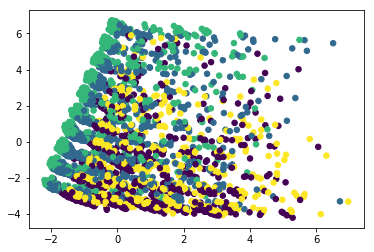

In [211]:
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=test_data["clusters"], s=30)
plt.show()

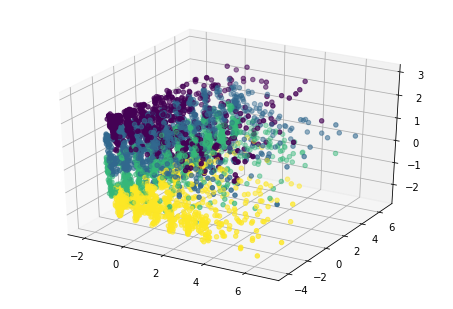

In [212]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs = plot_columns[:,1], ys = plot_columns[:,0], zs=plot_columns[:,2], zdir='z', c = test_data["clusters"])
plt.show()

### Using Variables to Correlate with States for Clustering - Non-Loyal

#### Step 1: Since we are studying effects by States, we should use variables that helps to differentiate between States

In [311]:
new_list = ['Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'Gender', 'Age', 'Num_Adults', 'Num_Children', 'Race', 'HH_Income', 'Eff_Income', 'Socioeconomic_Score', 'ZIP_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Occupation', 'Education', 'State', 'Est_HH_Debt_Level', 'Est_HH_Invest_Asset','Bank_Card', 'Retail_Card', 'Buyer_Retail_Last_Order_2yrs', 'Buyer_Retail_Last_Order_1yrs']

In [312]:
non_loyal_data = non_loyal_customers[new_list]

#### Step 2: Performing clustering method based on number of clusters

In [313]:
non_loyal_data_viz = non_loyal_data.copy()

non_loyal_data1 = non_loyal_data.copy()

non_loyal_data2 = non_loyal_data.copy()

non_loyal_data3 = non_loyal_data.copy()

non_loyal_data4 = non_loyal_data.copy()

In [219]:
k_modes = KModes(n_clusters = 3, init='Huang', n_init=5, verbose=1)

non_loyal_data['Cluster'] = k_modes.fit_predict(non_loyal_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4162, cost: 114384.0
Run 1, iteration: 2/100, moves: 1590, cost: 114104.0
Run 1, iteration: 3/100, moves: 270, cost: 114104.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2841, cost: 114262.0
Run 2, iteration: 2/100, moves: 589, cost: 113943.0
Run 2, iteration: 3/100, moves: 115, cost: 113943.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4351, cost: 115580.0
Run 3, iteration: 2/100, moves: 1396, cost: 114656.0
Run 3, iteration: 3/100, moves: 676, cost: 114656.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3546, cost: 116486.0
Run 4, iteration: 2/100, moves: 1335, cost: 115303.0
Run 4, iteration: 3/100, moves: 939, cost: 115068.0
Run 4, iteration: 4/100, moves: 92, cost: 115068.

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [220]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'F' 'C' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' 'U'
  'CA' 'B' 'A' 'U' 'U' 'N' 'N']
 ['S' 'O' 'S' 'F' 'G' '1' '0' 'W' 'C' 'C' 'B' '6' 'Y' 'D' 'E' 'U' 'U'
  'TX' 'B' 'F' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'G' 'U' 'U'
  'CA' 'H' 'G' 'M' 'M' 'N' 'N']]


In [221]:
k_modes = KModes(n_clusters = 4, init='Huang', n_init=5, verbose=1)

non_loyal_data1['Cluster'] = k_modes.fit_predict(non_loyal_data1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4470, cost: 111855.0
Run 1, iteration: 2/100, moves: 2143, cost: 111138.0
Run 1, iteration: 3/100, moves: 288, cost: 111036.0
Run 1, iteration: 4/100, moves: 44, cost: 111036.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3857, cost: 113048.0
Run 2, iteration: 2/100, moves: 1763, cost: 112099.0
Run 2, iteration: 3/100, moves: 341, cost: 112099.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4496, cost: 111686.0
Run 3, iteration: 2/100, moves: 1019, cost: 111509.0
Run 3, iteration: 3/100, moves: 41, cost: 111509.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4080, cost: 110620.0
Run 4, iteration: 2/100, moves: 720, cost: 110409.0
Run 4, iteration: 3/100, moves: 32, cost: 110409.0


In [222]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'F' 'E' '1' '0' 'W' 'E' 'C' 'C' '8' 'Y' 'G' 'F' 'U' 'U'
  'CA' 'B' 'G' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'C' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' 'U'
  'CA' 'B' 'A' 'U' 'U' 'N' 'N']
 ['M' 'O' 'S' 'F' 'G' '2' '0' 'W' 'F' 'D' 'D' '9' 'N' 'I' 'H' 'U' '2'
  'CA' 'B' 'J' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'D' 'C' 'B' '9' 'N' 'D' 'E' 'U' 'U'
  'TX' 'F' 'F' 'M' 'M' 'N' 'N']]


In [223]:
k_modes = KModes(n_clusters = 5, init='Huang', n_init=5, verbose=1)

non_loyal_data2['Cluster'] = k_modes.fit_predict(non_loyal_data2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4526, cost: 111482.0
Run 1, iteration: 2/100, moves: 1083, cost: 111272.0
Run 1, iteration: 3/100, moves: 231, cost: 111272.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4905, cost: 107563.0
Run 2, iteration: 2/100, moves: 735, cost: 107563.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4692, cost: 108633.0
Run 3, iteration: 2/100, moves: 1661, cost: 108633.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4458, cost: 111678.0
Run 4, iteration: 2/100, moves: 1852, cost: 111018.0
Run 4, iteration: 3/100, moves: 728, cost: 110308.0
Run 4, iteration: 4/100, moves: 518, cost: 110308.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/1

In [224]:
print(k_modes.cluster_centroids_)

[['S' 'R' 'S' 'F' 'C' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' '1'
  'CA' 'B' 'A' 'U' 'U' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'G' 'U' 'U'
  'CA' 'H' 'G' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'G' '1' '0' 'W' 'B' 'C' 'B' '0' 'Y' 'A' 'F' 'U' 'U'
  'CA' 'B' 'A' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'D' '1' '0' 'W' 'C' 'C' 'C' '6' 'Y' 'D' 'E' 'U' 'U'
  'TX' 'B' 'F' 'U' 'U' 'N' 'N']
 ['S' 'O' 'S' 'F' 'F' '1' '0' 'W' 'E' 'D' 'D' '8' 'Y' 'I' 'H' 'U' '2'
  'CA' 'B' 'J' 'M' 'M' 'N' 'N']]


In [225]:
k_modes = KModes(n_clusters = 6, init='Huang', n_init=5, verbose=1)

non_loyal_data3['Cluster'] = k_modes.fit_predict(non_loyal_data3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5273, cost: 107781.0
Run 1, iteration: 2/100, moves: 2161, cost: 106696.0
Run 1, iteration: 3/100, moves: 483, cost: 106696.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5548, cost: 108429.0
Run 2, iteration: 2/100, moves: 643, cost: 108429.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4468, cost: 107305.0
Run 3, iteration: 2/100, moves: 1049, cost: 106979.0
Run 3, iteration: 3/100, moves: 262, cost: 106979.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5084, cost: 108821.0
Run 4, iteration: 2/100, moves: 1882, cost: 107669.0
Run 4, iteration: 3/100, moves: 773, cost: 107219.0
Run 4, iteration: 4/100, moves: 473, cost: 106881.0
Run 4, iteration: 5/100, moves: 158, cost: 106881

In [226]:
print(k_modes.cluster_centroids_)

[['M' 'O' 'S' 'F' 'G' '2' '0' 'W' 'B' 'B' 'A' '9' 'Y' 'A' 'B' 'U' '1'
  'TX' 'B' 'A' 'M' 'M' 'N' 'N']
 ['S' 'R' 'S' 'F' 'B' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' 'U'
  'CA' 'B' 'A' 'U' 'U' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'D' 'D' 'D' '9' 'N' 'H' 'G' 'U' 'U'
  'CA' 'B' 'F' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'E' 'C' 'C' '8' 'N' 'G' 'F' 'U' 'U'
  'TX' 'H' 'G' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'D' '1' '0' 'W' 'D' 'C' 'C' '9' 'Y' 'A' 'E' 'U' 'U'
  'CA' 'B' 'F' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'E' '1' '0' 'W' 'C' 'C' 'B' '8' 'Y' 'D' 'E' 'U' 'U'
  'IL' 'B' 'A' 'M' 'M' 'N' 'N']]


In [227]:
k_modes = KModes(n_clusters = 7, init='Huang', n_init=5, verbose=1)

non_loyal_data4['Cluster'] = k_modes.fit_predict(non_loyal_data4)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4966, cost: 104929.0
Run 1, iteration: 2/100, moves: 1483, cost: 104741.0
Run 1, iteration: 3/100, moves: 332, cost: 104741.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4942, cost: 104393.0
Run 2, iteration: 2/100, moves: 1618, cost: 103613.0
Run 2, iteration: 3/100, moves: 280, cost: 103532.0
Run 2, iteration: 4/100, moves: 7, cost: 103532.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4468, cost: 105005.0
Run 3, iteration: 2/100, moves: 724, cost: 105005.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4414, cost: 103662.0
Run 4, iteration: 2/100, moves: 939, cost: 103528.0
Run 4, iteration: 3/100, moves: 17, cost: 103528.0
Init: initializing centroids
Init: initializing clust

In [228]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'F' 'D' '1' '0' 'W' 'D' 'C' 'C' '7' 'Y' 'D' 'E' 'U' 'U'
  'TX' 'B' 'F' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'B' 'U' '1'
  'TX' 'B' 'A' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'F' 'G' '1' '0' 'W' 'E' 'D' 'D' '4' 'Y' 'I' 'H' 'U' '2'
  'CA' 'B' 'J' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'E' '2' '0' 'W' 'E' 'C' 'B' '9' 'N' 'G' 'G' 'U' 'U'
  'CA' 'H' 'G' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'F' 'F' '2' '0' 'W' 'H' 'D' 'D' '9' 'N' 'I' 'H' 'U' '2'
  'CA' 'I' 'J' 'M' 'M' 'N' 'N']
 ['S' 'R' 'S' 'F' 'B' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' '1'
  'CA' 'B' 'A' 'U' 'U' 'N' 'N']
 ['S' 'O' 'S' 'F' 'F' '1' '0' 'W' 'B' 'C' 'B' '1' 'Y' 'A' 'A' 'U' 'U'
  'TX' 'B' 'A' 'M' 'M' 'N' 'N']]


#### Writing out clusters for loyal customers

In [247]:
new_list = non_loyal_data1['Cluster']

In [248]:
non_loyal_customers_dataset_4_clusters = pd.concat([non_loyal_customers, new_list], axis = 1)

In [249]:
non_loyal_customers_dataset_4_clusters.to_csv('non_loyal_customers_dataset_4_clusters.csv', index = False)

## Visualizing Data - Non-Loyal

In [314]:
test_data = pd.get_dummies(non_loyal_data_viz)

In [315]:
x = test_data.reset_index().values

In [316]:
km = KModes(n_clusters = 4, init = 'Huang', n_init = 5, verbose = 1)

In [317]:
clusters = km.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2277, cost: 176832.0
Run 1, iteration: 2/100, moves: 675, cost: 176777.0
Run 1, iteration: 3/100, moves: 45, cost: 176777.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4493, cost: 177217.0
Run 2, iteration: 2/100, moves: 1223, cost: 176715.0
Run 2, iteration: 3/100, moves: 574, cost: 176262.0
Run 2, iteration: 4/100, moves: 374, cost: 176163.0
Run 2, iteration: 5/100, moves: 214, cost: 176163.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4441, cost: 177135.0
Run 3, iteration: 2/100, moves: 629, cost: 177135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5394, cost: 178756.0
Run 4, iteration: 2/100, moves: 564, cost: 178755.0
Run 4, iteration: 3/100, moves: 0, cost: 178755.0
In

In [318]:
test_data['clusters'] = clusters

In [319]:
pca = decomposition.PCA(3)

In [320]:
plot_columns = pca.fit_transform(test_data)

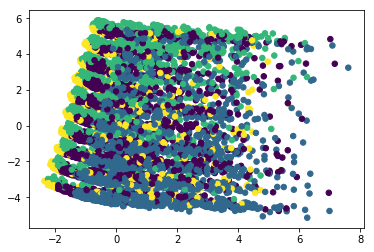

In [321]:
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=test_data["clusters"], s=30)
plt.show()

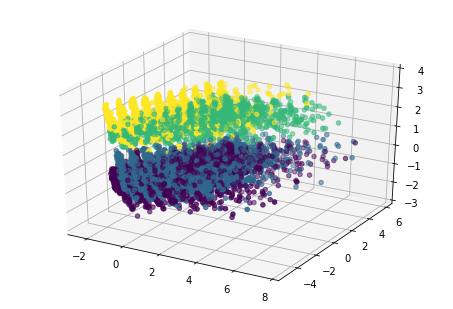

In [322]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs = plot_columns[:,1], ys = plot_columns[:,0], zs=plot_columns[:,2], zdir='z', c = test_data["clusters"])
plt.show()

### Using Variables to Correlate with States for Clustering - Not-Engaged

#### Step 1: Since we are studying effects by States, we should use variables that helps to differentiate between States

In [250]:
new_list = ['Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'Gender', 'Age', 'Num_Adults', 'Num_Children', 'Race', 'HH_Income', 'Eff_Income', 'Socioeconomic_Score', 'ZIP_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Occupation', 'Education', 'State', 'Est_HH_Debt_Level', 'Est_HH_Invest_Asset','Bank_Card', 'Retail_Card', 'Buyer_Retail_Last_Order_2yrs', 'Buyer_Retail_Last_Order_1yrs']

In [251]:
not_engaged_data = not_engaged_customers[new_list]

#### Step 2: Performing clustering method based on number of clusters

In [252]:
not_engaged_data_viz = not_engaged_data.copy()

not_engaged_data1 = not_engaged_data.copy()

not_engaged_data2 = not_engaged_data.copy()

not_engaged_data3 = not_engaged_data.copy()

not_engaged_data4 = not_engaged_data.copy()

In [253]:
k_modes = KModes(n_clusters = 3, init='Huang', n_init=5, verbose=1)

not_engaged_data['Cluster'] = k_modes.fit_predict(not_engaged_data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5532, cost: 207023.0
Run 1, iteration: 2/100, moves: 3225, cost: 206331.0
Run 1, iteration: 3/100, moves: 975, cost: 206007.0
Run 1, iteration: 4/100, moves: 96, cost: 206007.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6710, cost: 207648.0
Run 2, iteration: 2/100, moves: 2169, cost: 207282.0
Run 2, iteration: 3/100, moves: 199, cost: 207282.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7020, cost: 209024.0
Run 3, iteration: 2/100, moves: 2436, cost: 208389.0
Run 3, iteration: 3/100, moves: 975, cost: 208389.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5707, cost: 205984.0
Run 4, iteration: 2/100, moves: 1192, cost: 205984.0
Init: initializing centroids
Init: initializing c

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [254]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'M' 'D' '1' '0' 'W' 'C' 'C' 'B' '8' 'Y' 'A' 'E' 'U' 'U'
  'CA' 'B' 'F' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'M' 'C' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' '1'
  'CA' 'B' 'A' 'U' 'U' 'N' 'N']
 ['M' 'O' 'S' 'M' 'E' '2' '0' 'W' 'E' 'D' 'D' '9' 'N' 'G' 'G' 'U' 'U'
  'TX' 'H' 'G' 'M' 'M' 'N' 'N']]


In [255]:
k_modes = KModes(n_clusters = 4, init='Huang', n_init=5, verbose=1)

not_engaged_data1['Cluster'] = k_modes.fit_predict(not_engaged_data1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7129, cost: 202999.0
Run 1, iteration: 2/100, moves: 1554, cost: 202999.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7773, cost: 202742.0
Run 2, iteration: 2/100, moves: 2226, cost: 202742.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6190, cost: 199931.0
Run 3, iteration: 2/100, moves: 151, cost: 199931.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 6965, cost: 202892.0
Run 4, iteration: 2/100, moves: 606, cost: 202892.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7102, cost: 199054.0
Run 5, iteration: 2/100, moves: 651, cost: 199054.0
Best run was number 5


In [256]:
print(k_modes.cluster_centroids_)

[['M' 'O' 'S' 'M' 'F' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'G' 'U' 'U'
  'CA' 'H' 'F' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'M' 'G' '1' '0' 'W' 'C' 'C' 'B' '8' 'Y' 'A' 'F' 'U' 'U'
  'NY' 'B' 'A' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'M' 'D' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' '1'
  'TX' 'C' 'A' 'U' 'U' 'N' 'N']
 ['M' 'O' 'S' 'M' 'E' '2' '0' 'W' 'H' 'D' 'D' '9' 'Y' 'I' 'H' 'U' '2'
  'CA' 'H' 'J' 'M' 'M' 'N' 'N']]


In [257]:
k_modes = KModes(n_clusters = 5, init='Huang', n_init=5, verbose=1)

not_engaged_data2['Cluster'] = k_modes.fit_predict(not_engaged_data2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7845, cost: 198788.0
Run 1, iteration: 2/100, moves: 3837, cost: 197197.0
Run 1, iteration: 3/100, moves: 110, cost: 197197.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5855, cost: 196746.0
Run 2, iteration: 2/100, moves: 151, cost: 196746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7850, cost: 194551.0
Run 3, iteration: 2/100, moves: 1035, cost: 193988.0
Run 3, iteration: 3/100, moves: 345, cost: 193988.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9803, cost: 197036.0
Run 4, iteration: 2/100, moves: 2859, cost: 196177.0
Run 4, iteration: 3/100, moves: 916, cost: 196177.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/1

In [258]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'M' 'C' '1' '0' 'W' 'C' 'C' 'B' '6' 'Y' 'A' 'A' 'U' 'U'
  'CA' 'F' 'A' 'U' 'U' 'N' 'N']
 ['M' 'O' 'S' 'M' 'F' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'G' 'U' 'U'
  'CA' 'H' 'G' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'M' 'D' '1' '0' 'W' 'C' 'C' 'C' '8' 'Y' 'A' 'E' 'U' 'U'
  'CA' 'B' 'F' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'M' 'E' '2' '0' 'W' 'H' 'D' 'D' '9' 'N' 'I' 'H' 'U' '2'
  'CA' 'H' 'J' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'M' 'E' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' '1'
  'TX' 'B' 'A' 'M' 'M' 'N' 'N']]


In [259]:
k_modes = KModes(n_clusters = 6, init='Huang', n_init=5, verbose=1)

not_engaged_data3['Cluster'] = k_modes.fit_predict(not_engaged_data3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8495, cost: 193556.0
Run 1, iteration: 2/100, moves: 2587, cost: 192903.0
Run 1, iteration: 3/100, moves: 193, cost: 192903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7791, cost: 195675.0
Run 2, iteration: 2/100, moves: 5305, cost: 191602.0
Run 2, iteration: 3/100, moves: 1628, cost: 191479.0
Run 2, iteration: 4/100, moves: 330, cost: 191348.0
Run 2, iteration: 5/100, moves: 50, cost: 191348.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8383, cost: 191904.0
Run 3, iteration: 2/100, moves: 362, cost: 191904.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9590, cost: 195259.0
Run 4, iteration: 2/100, moves: 4636, cost: 191094.0
Run 4, iteration: 3/100, moves: 3143, cost: 18949

In [260]:
print(k_modes.cluster_centroids_)

[['M' 'O' 'S' 'M' 'C' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'F' 'U' 'U'
  'CA' 'H' 'F' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'M' 'B' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' '1'
  'TX' 'B' 'A' 'U' 'U' 'N' 'N']
 ['S' 'O' 'S' 'M' 'G' '1' '0' 'W' 'C' 'C' 'B' '6' 'Y' 'A' 'E' 'U' 'U'
  'CA' 'B' 'F' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'M' 'D' '1' '0' 'W' 'E' 'D' 'D' '9' 'Y' 'I' 'G' 'U' '2'
  'CA' 'B' 'G' 'U' 'U' 'N' 'N']
 ['M' 'O' 'S' 'M' 'E' '2' '0' 'W' 'C' 'B' 'A' '9' 'N' 'A' 'B' 'U' '1'
  'TX' 'B' 'A' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'M' 'F' '2' '0' 'W' 'F' 'D' 'D' '8' 'N' 'I' 'G' 'U' '2'
  'CA' 'B' 'G' 'M' 'M' 'N' 'N']]


In [261]:
k_modes = KModes(n_clusters = 7, init='Huang', n_init=5, verbose=1)

not_engaged_data4['Cluster'] = k_modes.fit_predict(not_engaged_data4)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8693, cost: 189415.0
Run 1, iteration: 2/100, moves: 3010, cost: 187529.0
Run 1, iteration: 3/100, moves: 558, cost: 187529.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 7306, cost: 187718.0
Run 2, iteration: 2/100, moves: 2535, cost: 187178.0
Run 2, iteration: 3/100, moves: 343, cost: 187178.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6443, cost: 187746.0
Run 3, iteration: 2/100, moves: 2711, cost: 187746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9702, cost: 187774.0
Run 4, iteration: 2/100, moves: 2659, cost: 187774.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 7822, cost: 188861.0
Run 5, iteration: 2

In [262]:
print(k_modes.cluster_centroids_)

[['S' 'O' 'S' 'M' 'F' '1' '0' 'W' 'C' 'C' 'C' '8' 'Y' 'D' 'F' 'U' 'U'
  'IL' 'B' 'F' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'M' 'E' '2' '0' 'W' 'C' 'B' 'A' '8' 'Y' 'A' 'B' 'U' '1'
  'TX' 'E' 'A' 'M' 'M' 'N' 'N']
 ['S' 'R' 'S' 'M' 'B' '1' '0' 'W' 'B' 'B' 'A' '0' 'Y' 'A' 'A' 'U' 'U'
  'CA' 'B' 'A' 'U' 'U' 'N' 'N']
 ['M' 'O' 'S' 'M' 'D' '2' '0' 'W' 'E' 'D' 'D' '8' 'N' 'G' 'F' 'U' '2'
  'TX' 'H' 'F' 'M' 'U' 'N' 'N']
 ['M' 'O' 'S' 'M' 'E' '2' '0' 'W' 'H' 'D' 'D' '9' 'N' 'I' 'H' 'U' '2'
  'CA' 'H' 'J' 'M' 'M' 'N' 'N']
 ['S' 'O' 'S' 'M' 'E' '1' '0' 'W' 'F' 'D' 'D' '9' 'Y' 'I' 'H' 'U' '2'
  'CA' 'B' 'J' 'M' 'M' 'N' 'N']
 ['M' 'O' 'S' 'M' 'G' '2' '0' 'W' 'E' 'C' 'C' '9' 'N' 'G' 'G' 'U' 'U'
  'NY' 'B' 'G' 'M' 'M' 'N' 'N']]


#### Writing out clusters for not engaged customers

In [308]:
new_list = not_engaged_data4['Cluster']

In [309]:
not_engaged_customers_dataset_7_clusters = pd.concat([not_engaged_customers, new_list], axis = 1)

In [310]:
not_engaged_customers_dataset_7_clusters.to_csv('not_engaged_customers_dataset_7_clusters.csv', index = False)

## Visualizing Data - Not-engaged

In [299]:
test_data = pd.get_dummies(not_engaged_data_viz)

In [300]:
x = test_data.reset_index().values

In [301]:
km = KModes(n_clusters = 7, init = 'Huang', n_init = 5, verbose = 1)

In [302]:
clusters = km.fit_predict(x)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8418, cost: 299866.0
Run 1, iteration: 2/100, moves: 2316, cost: 299866.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 10449, cost: 309454.0
Run 2, iteration: 2/100, moves: 3530, cost: 308006.0
Run 2, iteration: 3/100, moves: 300, cost: 308005.0
Run 2, iteration: 4/100, moves: 0, cost: 308005.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8670, cost: 302400.0
Run 3, iteration: 2/100, moves: 2404, cost: 299512.0
Run 3, iteration: 3/100, moves: 1399, cost: 298681.0
Run 3, iteration: 4/100, moves: 936, cost: 298680.0
Run 3, iteration: 5/100, moves: 0, cost: 298680.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9949, cost: 302852.0
Run 4, iteration: 2/100, moves: 2111, cost: 302852.

In [303]:
test_data['clusters'] = clusters

In [304]:
pca = decomposition.PCA(3)

In [305]:
plot_columns = pca.fit_transform(test_data)

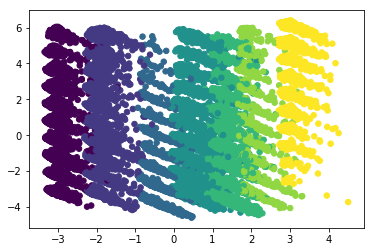

In [306]:
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=test_data["clusters"], s=30)
plt.show()

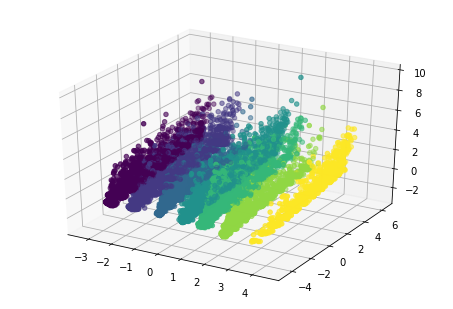

In [307]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs = plot_columns[:,1], ys = plot_columns[:,0], zs=plot_columns[:,2], zdir='z', c = test_data["clusters"])
plt.show()